In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

# set up notebook to display multiple output in one cell
from IPython.display import Latex
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)

In [48]:
import scipy.stats as stats

In [2]:
work_dir = "./"

In [3]:
filePaths = [f for f in os.listdir(work_dir) if f.endswith(".txt")]
for i in range(len(filePaths)):
    print(f'{i} - {filePaths[i]}')

0 - NoLoadBalancer.txt
1 - KubernetesLoadBalancer.txt
2 - LinkerdBalancer.txt


# No Load Balancer

In [4]:
file = pd.read_csv(work_dir+filePaths[0], sep=',')

In [5]:
file.head()

iterStep               process      time
0         0  health serialization  0.012084
1         1   order serialization  0.041237
2         2  health serialization  0.008462
3         3   order serialization  0.050539
4         4  health serialization  0.013211

In [6]:
datDF = file.copy()
datDF['iterStep'] = datDF['iterStep'].astype(int)
datDF['process'] = datDF['process'].astype(str)
datDF['time'] = datDF['time'].astype(float)
datDF['test'] = 'baseline'
datDF.head()

iterStep               process      time      test
0         0  health serialization  0.012084  baseline
1         1   order serialization  0.041237  baseline
2         2  health serialization  0.008462  baseline
3         3   order serialization  0.050539  baseline
4         4  health serialization  0.013211  baseline

In [7]:
tmpLST = []
for i in range(len(datDF)):
    if 'health' in datDF['process'][i].lower():
        tmpLST.append("health")
        datDF.at[i,'process'] = datDF['process'][i].lower().replace('health ',"")

    if 'order' in datDF['process'][i].lower():
        tmpLST.append("order")
        datDF.at[i,'process'] = datDF['process'][i].lower().replace('order ',"")
    
datDF['server'] = tmpLST

In [8]:
datDF.head()

iterStep        process      time      test  server
0         0  serialization  0.012084  baseline  health
1         1  serialization  0.041237  baseline   order
2         2  serialization  0.008462  baseline  health
3         3  serialization  0.050539  baseline   order
4         4  serialization  0.013211  baseline  health

In [9]:
serialDF = datDF[datDF['process']=='serialization'].reset_index(drop=True)

# convert seconds to miliseconds
serialDF['time'] = serialDF['time']*1000

serialDF.head()

iterStep        process       time      test  server
0         0  serialization  12.083530  baseline  health
1         1  serialization  41.236877  baseline   order
2         2  serialization   8.462429  baseline  health
3         3  serialization  50.538540  baseline   order
4         4  serialization  13.211250  baseline  health

In [10]:
deserialDF = datDF[datDF['process']=='deserialization'].reset_index(drop=True)
deserialDF.head()

Empty DataFrame
Columns: [iterStep, process, time, test, server]
Index: []

# Latency Data Analysis

For this analysis we will be using a boxplot. A box and whisker plot (otherwise known as a boxplot), is a graph summarising a set of data. The shape of the boxplot shows how the data is distributed and it also shows any outliers. It is a useful way to compare different sets of data as you can draw more than one boxplot per graph. These can be displayed alongside a number line, horizontally or vertically.

# Reading a Box and Whisker Plot

Interpreting a boxplot can be done once you understand what the different lines mean on a box and whisker diagram. The line splitting the box in two represents the median value. This shows that 50% of the data lies on the left hand side of the median value and 50% lies on the right hand side. The left edge of the box represents the lower quartile; it shows the value at which the first 25% of the data falls up to. The right edge of the box shows the upper quartile; it shows that 25% of the data lies to the right of the upper quartile value. The values at which the horizontal lines stop at are the values of the upper and lower values of the data. The single points on the diagram show the outliers.

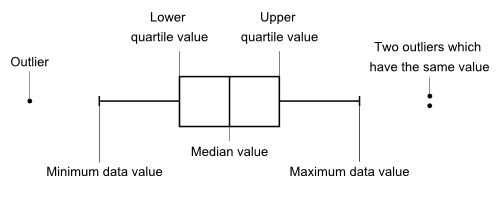

# Serialization

<AxesSubplot:xlabel='time', ylabel='server'>

Text(0.5, 0, 'time (ms)')

Text(0, 0.5, 'Server Latency')

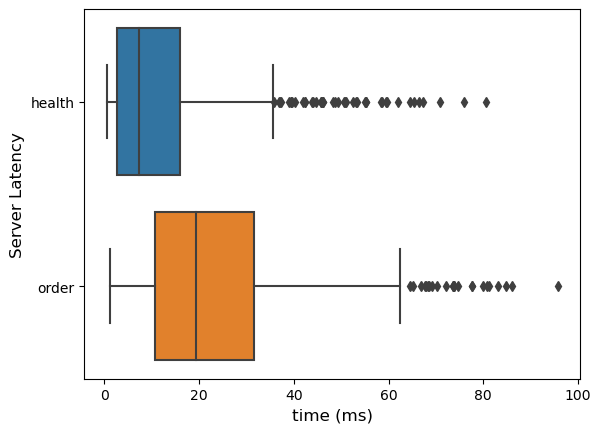

In [11]:
sns.boxplot(data=serialDF, x="time", y="server")
plt.xlabel('time (ms)', fontsize=12)
plt.ylabel('Server Latency', fontsize=12)
plt.show()

## Health Server

In [12]:
tmpHealth = serialDF[serialDF['server']=='health'].reset_index(drop=True)
tmpHealth.head()
print("Median value: {}".format(np.round_(np.median(tmpHealth['time']),3)))
tmpHealth.describe()

iterStep        process       time      test  server
0         0  serialization  12.083530  baseline  health
1         2  serialization   8.462429  baseline  health
2         4  serialization  13.211250  baseline  health
3         6  serialization   1.258373  baseline  health
4         8  serialization  17.588139  baseline  health

Median value: 7.274


iterStep         time
count  1000.000000  1000.000000
mean    999.000000    11.288423
std     577.638872    12.280577
min       0.000000     0.566721
25%     499.500000     2.707362
50%     999.000000     7.273674
75%    1498.500000    15.944898
max    1998.000000    80.595970

## Order Server

In [13]:
tmpOrder = serialDF[serialDF['server']=='order'].reset_index(drop=True)
tmpOrder.head()
print("Median value: {}".format(np.round_(np.median(tmpOrder['time']),3)))
tmpOrder.describe()

iterStep        process       time      test server
0         1  serialization  41.236877  baseline  order
1         3  serialization  50.538540  baseline  order
2         5  serialization  30.599356  baseline  order
3         7  serialization  20.239592  baseline  order
4         9  serialization   8.718967  baseline  order

Median value: 19.428


iterStep         time
count  1000.000000  1000.000000
mean   1000.000000    22.833373
std     577.638872    16.024076
min       1.000000     1.308918
25%     500.500000    10.739088
50%    1000.000000    19.428253
75%    1499.500000    31.636894
max    1999.000000    95.691919

# Kubernetes Load Balancer

In [14]:
file1 = pd.read_csv(work_dir+filePaths[1], sep=',')

In [15]:
file1.head()

iterStep               process      time
0         0  health serialization  0.038236
1         1   order serialization  0.015282
2         2  health serialization  0.009407
3         3   order serialization  0.001559
4         4  health serialization  0.004910

In [16]:
datDF1 = file1.copy()
datDF1['iterStep'] = datDF1['iterStep'].astype(int)
datDF1['process'] = datDF1['process'].astype(str)
datDF1['time'] = datDF1['time'].astype(float)
datDF1['test'] = 'kubernetes'
datDF1.head()

iterStep               process      time        test
0         0  health serialization  0.038236  kubernetes
1         1   order serialization  0.015282  kubernetes
2         2  health serialization  0.009407  kubernetes
3         3   order serialization  0.001559  kubernetes
4         4  health serialization  0.004910  kubernetes

In [17]:
tmpLST = []
for i in range(len(datDF1)):
    if 'health' in datDF1['process'][i].lower():
        tmpLST.append("health")
        datDF1.at[i,'process'] = datDF1['process'][i].lower().replace('health ',"")

    if 'order' in datDF1['process'][i].lower():
        tmpLST.append("order")
        datDF1.at[i,'process'] = datDF1['process'][i].lower().replace('order ',"")
    
datDF1['server'] = tmpLST

In [18]:
datDF1.head()

iterStep        process      time        test  server
0         0  serialization  0.038236  kubernetes  health
1         1  serialization  0.015282  kubernetes   order
2         2  serialization  0.009407  kubernetes  health
3         3  serialization  0.001559  kubernetes   order
4         4  serialization  0.004910  kubernetes  health

In [19]:
serialDF1 = datDF1[datDF1['process']=='serialization'].reset_index(drop=True)

# convert seconds to miliseconds
serialDF1['time'] = serialDF1['time']*1000

serialDF1.head()

iterStep        process       time        test  server
0         0  serialization  38.236141  kubernetes  health
1         1  serialization  15.282154  kubernetes   order
2         2  serialization   9.406567  kubernetes  health
3         3  serialization   1.558781  kubernetes   order
4         4  serialization   4.910469  kubernetes  health

In [20]:
deserialDF1 = datDF1[datDF1['process']=='deserialization'].reset_index(drop=True)
deserialDF1.head()

Empty DataFrame
Columns: [iterStep, process, time, test, server]
Index: []

<AxesSubplot:xlabel='time', ylabel='server'>

Text(0.5, 0, 'time (ms)')

Text(0, 0.5, 'Server Latency')

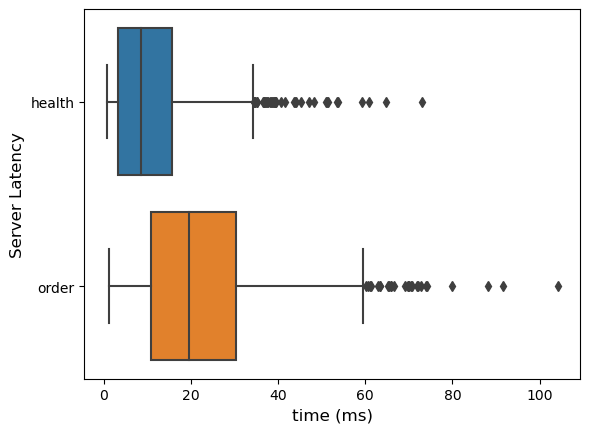

In [21]:
sns.boxplot(data=serialDF1, x="time", y="server")
plt.xlabel('time (ms)', fontsize=12)
plt.ylabel('Server Latency', fontsize=12)
plt.show()

In [22]:
tmpHealth1 = serialDF1[serialDF1['server']=='health'].reset_index(drop=True)
tmpHealth1.head()
print("Median value: {}".format(np.round_(np.median(tmpHealth1['time']),3)))
tmpHealth1.describe()

iterStep        process       time        test  server
0         0  serialization  38.236141  kubernetes  health
1         2  serialization   9.406567  kubernetes  health
2         4  serialization   4.910469  kubernetes  health
3         6  serialization   2.169609  kubernetes  health
4         8  serialization   0.864506  kubernetes  health

Median value: 8.447


iterStep         time
count  1000.000000  1000.000000
mean    999.000000    11.208754
std     577.638872    10.484747
min       0.000000     0.687838
25%     499.500000     3.250659
50%     999.000000     8.446932
75%    1498.500000    15.688717
max    1998.000000    73.062420

In [23]:
tmpOrder1 = serialDF1[serialDF1['server']=='order'].reset_index(drop=True)
tmpOrder1.head()
print("Median value: {}".format(np.round_(np.median(tmpOrder1['time']),3)))
tmpOrder1.describe()

iterStep        process       time        test server
0         1  serialization  15.282154  kubernetes  order
1         3  serialization   1.558781  kubernetes  order
2         5  serialization   8.753061  kubernetes  order
3         7  serialization   1.315117  kubernetes  order
4         9  serialization  20.848274  kubernetes  order

Median value: 19.451


iterStep         time
count  1000.000000  1000.000000
mean   1000.000000    22.242074
std     577.638872    15.316566
min       1.000000     1.237869
25%     500.500000    10.831952
50%    1000.000000    19.450903
75%    1499.500000    30.449092
max    1999.000000   104.173183

# Linkerd Balancer

In [24]:
file2 = pd.read_csv(work_dir+filePaths[2], sep=',')

In [25]:
file2.head()

iterStep               process      time
0         0  health serialization  0.074676
1         1   order serialization  0.074428
2         2  health serialization  0.016539
3         3   order serialization  0.008974
4         4  health serialization  0.033329

In [26]:
datDF2 = file1.copy()
datDF2['iterStep'] = datDF2['iterStep'].astype(int)
datDF2['process'] = datDF2['process'].astype(str)
datDF2['time'] = datDF2['time'].astype(float)
datDF2['test'] = 'linkerd'
datDF2.head()

iterStep               process      time     test
0         0  health serialization  0.038236  linkerd
1         1   order serialization  0.015282  linkerd
2         2  health serialization  0.009407  linkerd
3         3   order serialization  0.001559  linkerd
4         4  health serialization  0.004910  linkerd

In [27]:
tmpLST = []
for i in range(len(datDF2)):
    if 'health' in datDF2['process'][i].lower():
        tmpLST.append("health")
        datDF2.at[i,'process'] = datDF2['process'][i].lower().replace('health ',"")

    if 'order' in datDF2['process'][i].lower():
        tmpLST.append("order")
        datDF2.at[i,'process'] = datDF2['process'][i].lower().replace('order ',"")
    
datDF2['server'] = tmpLST

In [28]:
datDF2.head()

iterStep        process      time     test  server
0         0  serialization  0.038236  linkerd  health
1         1  serialization  0.015282  linkerd   order
2         2  serialization  0.009407  linkerd  health
3         3  serialization  0.001559  linkerd   order
4         4  serialization  0.004910  linkerd  health

In [29]:
serialDF2 = datDF2[datDF2['process']=='serialization'].reset_index(drop=True)

# convert seconds to miliseconds
serialDF2['time'] = serialDF2['time']*1000

serialDF2.head()

iterStep        process       time     test  server
0         0  serialization  38.236141  linkerd  health
1         1  serialization  15.282154  linkerd   order
2         2  serialization   9.406567  linkerd  health
3         3  serialization   1.558781  linkerd   order
4         4  serialization   4.910469  linkerd  health

In [30]:
deserialDF2 = datDF2[datDF2['process']=='deserialization'].reset_index(drop=True)
deserialDF2.head()

Empty DataFrame
Columns: [iterStep, process, time, test, server]
Index: []

<AxesSubplot:xlabel='time', ylabel='server'>

Text(0.5, 0, 'time (ms)')

Text(0, 0.5, 'Server Latency')

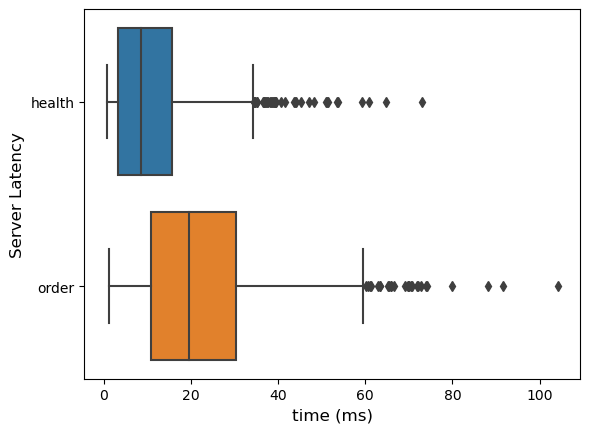

In [31]:
sns.boxplot(data=serialDF2, x="time", y="server")
plt.xlabel('time (ms)', fontsize=12)
plt.ylabel('Server Latency', fontsize=12)
plt.show()

In [32]:
tmpHealth2 = serialDF2[serialDF2['server']=='health'].reset_index(drop=True)
tmpHealth2.head()
print("Median value: {}".format(np.round_(np.median(tmpHealth2['time']),3)))
tmpHealth2.describe()

iterStep        process       time     test  server
0         0  serialization  38.236141  linkerd  health
1         2  serialization   9.406567  linkerd  health
2         4  serialization   4.910469  linkerd  health
3         6  serialization   2.169609  linkerd  health
4         8  serialization   0.864506  linkerd  health

Median value: 8.447


iterStep         time
count  1000.000000  1000.000000
mean    999.000000    11.208754
std     577.638872    10.484747
min       0.000000     0.687838
25%     499.500000     3.250659
50%     999.000000     8.446932
75%    1498.500000    15.688717
max    1998.000000    73.062420

In [33]:
tmpOrder2 = serialDF2[serialDF2['server']=='order'].reset_index(drop=True)
tmpOrder2.head()
print("Median value: {}".format(np.round_(np.median(tmpOrder2['time']),3)))
tmpOrder2.describe()

iterStep        process       time     test server
0         1  serialization  15.282154  linkerd  order
1         3  serialization   1.558781  linkerd  order
2         5  serialization   8.753061  linkerd  order
3         7  serialization   1.315117  linkerd  order
4         9  serialization  20.848274  linkerd  order

Median value: 19.451


iterStep         time
count  1000.000000  1000.000000
mean   1000.000000    22.242074
std     577.638872    15.316566
min       1.000000     1.237869
25%     500.500000    10.831952
50%    1000.000000    19.450903
75%    1499.500000    30.449092
max    1999.000000   104.173183

Health Plots

In [51]:
healthPlots = pd.DataFrame()
healthPlots = pd.concat([healthPlots, tmpHealth])
healthPlots = pd.concat([healthPlots, tmpHealth1])
healthPlots = pd.concat([healthPlots, tmpHealth2])

healthPlots = healthPlots.reset_index(drop=True)

healthPlots.shape
healthPlots.head()

(3000, 5)

iterStep        process       time      test  server
0         0  serialization  12.083530  baseline  health
1         2  serialization   8.462429  baseline  health
2         4  serialization  13.211250  baseline  health
3         6  serialization   1.258373  baseline  health
4         8  serialization  17.588139  baseline  health

<AxesSubplot:xlabel='time', ylabel='test'>

Text(0.5, 0, 'time (ms)')

Text(0, 0.5, 'Server Latency')

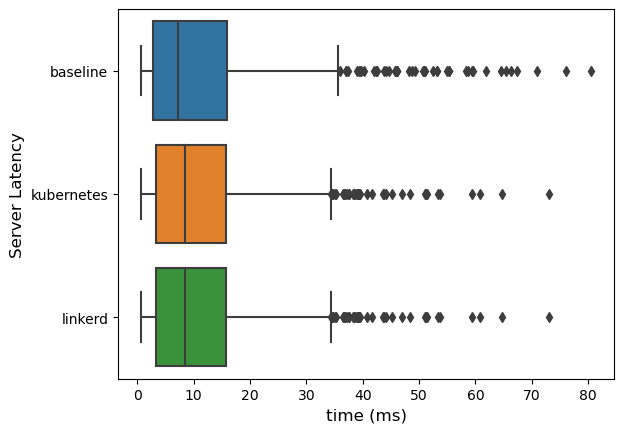

In [52]:
sns.boxplot(data=healthPlots, x="time", y="test")
plt.xlabel('time (ms)', fontsize=12)
plt.ylabel('Health Server Latency', fontsize=12)
plt.show()

In [53]:
orderPlots = pd.DataFrame()
orderPlots = pd.concat([orderPlots, tmpOrder])
orderPlots = pd.concat([orderPlots, tmpOrder1])
orderPlots = pd.concat([orderPlots, tmpOrder2])

orderPlots = orderPlots.reset_index(drop=True)

orderPlots.shape
orderPlots.head()

(3000, 5)

iterStep        process       time      test server
0         1  serialization  41.236877  baseline  order
1         3  serialization  50.538540  baseline  order
2         5  serialization  30.599356  baseline  order
3         7  serialization  20.239592  baseline  order
4         9  serialization   8.718967  baseline  order

<AxesSubplot:xlabel='time', ylabel='test'>

Text(0.5, 0, 'time (ms)')

Text(0, 0.5, 'Order Server Latency')

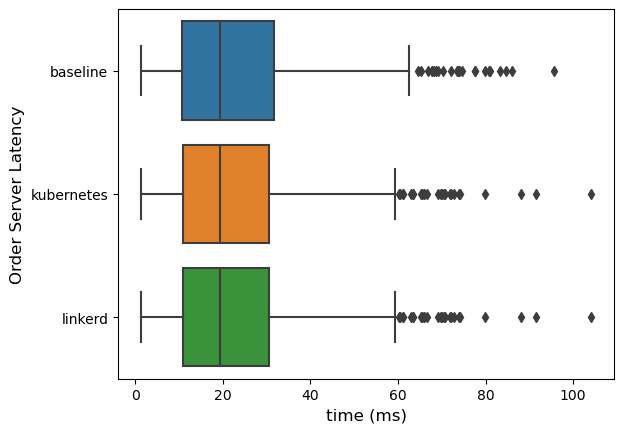

In [54]:
sns.boxplot(data=orderPlots, x="time", y="test")
plt.xlabel('time (ms)', fontsize=12)
plt.ylabel('Order Server Latency', fontsize=12)
plt.show()

# Two Sample t-Test for Health Server

In [35]:
group0 = tmpHealth['time'].values
group1 = tmpHealth1['time'].values
group2 = tmpHealth2['time'].values

Before we perform the test, we need to decide if we’ll assume the two populations have equal variances or not. As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1.

In [36]:
tmp_x1 = group0
tmp_x2 = group1

#find variance for each group
print("X1: {} | X2: {}\n".format(np.var(tmp_x1), np.var(tmp_x2)))

if np.var(tmp_x1)>=np.var(tmp_x2):
    print("X1 is larger")
    print(np.var(tmp_x1)/np.var(tmp_x2))
else:
    print("X2 is larger")
    print(np.var(tmp_x2)/np.var(tmp_x1))

X1: 150.66176539977914 | X2: 109.81999556553978

X1 is larger
1.3718973910344523


In [37]:
tmp_x1 = group0
tmp_x2 = group2

#find variance for each group
print("X1: {} | X2: {}\n".format(np.var(tmp_x1), np.var(tmp_x2)))

if np.var(tmp_x1)>=np.var(tmp_x2):
    print("X1 is larger")
    print(np.var(tmp_x1)/np.var(tmp_x2))
else:
    print("X2 is larger")
    print(np.var(tmp_x2)/np.var(tmp_x1))

X1: 150.66176539977914 | X2: 109.81999556553978

X1 is larger
1.3718973910344523


In [38]:
tmp_x1 = group1
tmp_x2 = group2

#find variance for each group
print("X1: {} | X2: {}\n".format(np.var(tmp_x1), np.var(tmp_x2)))

if np.var(tmp_x1)>=np.var(tmp_x2):
    print("X1 is larger")
    print(np.var(tmp_x1)/np.var(tmp_x2))
else:
    print("X2 is larger")
    print(np.var(tmp_x2)/np.var(tmp_x1))

X1: 109.81999556553978 | X2: 109.81999556553978

X1 is larger
1.0


Thus, we can proceed to perform the two sample t-test with equal variances:

The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

In [39]:
tmp_x1 = group0
tmp_x2 = group1

#perform two sample t-test with equal variances
statVal, pvalue = stats.ttest_ind(a=tmp_x1, b=tmp_x2, equal_var=True)

In [40]:
print(statVal)

0.15602067188091598


In [41]:
print(pvalue)

0.87603248848226


Because the p-value of our test is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean between the two populations is different.

In [42]:
tmp_x1 = group0
tmp_x2 = group2

#perform two sample t-test with equal variances
statVal, pvalue = stats.ttest_ind(a=tmp_x1, b=tmp_x2, equal_var=True)

In [43]:
print(statVal)

0.15602067188091598


In [44]:
print(pvalue)

0.87603248848226


Because the p-value of our test is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean between the two populations is different.

In [45]:
tmp_x1 = group1
tmp_x2 = group2

#perform two sample t-test with equal variances
statVal, pvalue = stats.ttest_ind(a=tmp_x1, b=tmp_x2, equal_var=True)

In [46]:
print(statVal)

0.0


In [47]:
print(pvalue)

1.0
